<a href="https://colab.research.google.com/github/diogojorgebasso/bootcamp-python-igti/blob/main/desafio_mod4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


In [43]:
df = pd.read_csv("https://raw.githubusercontent.com/diogojorgebasso/bootcamp-python-igti/modulo-4/doencas_coracao.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [17]:
df.loc[df['DEATH_EVENT'] == 1,'age'].mean()

65.21528125

In [39]:
pessoas_morreram = df[df['DEATH_EVENT'] == 1  and df['sex']==0]
pessoas_morreram
#pessoas_morreram.iloc[pessoas_morreram['sex']==0]

ValueError: ignored

In [42]:
testing = pd.DataFrame({'a': range(5), 'b': range(5) })
testing['a']

1

In [50]:
df.query('sex == 0 & DEATH_EVENT == 1').shape

(71, 13)

Pergunta 5: Após dividir as colunas do dataframe entre entrada e saída, aplicar a normalização dos dados como apresentado no enunciado (MinMaxScaler()) e dividir esses dados entre treinamento e teste, aplique o algoritmo KNN. Qual é, aproximadamente, a acurácia do modelo?


### dados para a realização do ex
clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_arvore = DecisionTreeClassifier(random_state=1)
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,
10), random_state=1)

In [112]:
# leitura
df = pd.read_csv("https://raw.githubusercontent.com/diogojorgebasso/bootcamp-python-igti/modulo-4/doencas_coracao.csv")


In [146]:
#preprando os dados
entradas = df.iloc[:, :-1].values # todas as linhas das colunas e excluindo a última
saida = df.iloc[:,12].values # target

In [147]:
from sklearn.preprocessing import MinMaxScaler #normalizando os dados
normaliza = MinMaxScaler()
entradas_normalizadas=normaliza.fit_transform(entradas)

In [148]:
from sklearn.model_selection import train_test_split # dividir em dados de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(entradas_normalizadas, saida,
test_size=0.30,random_state=42)

In [ ]:
KNN

In [149]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [150]:
y_pred = clf_KNN.predict(X_test) #prever o modelo

In [151]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) #61 por cento de acurácia!

              precision    recall  f1-score   support

           0       0.61      0.96      0.74        53
           1       0.67      0.11      0.19        37

    accuracy                           0.61        90
   macro avg       0.64      0.54      0.47        90
weighted avg       0.63      0.61      0.51        90



Após dividir as colunas do dataframe entre entrada e saída, aplicar a normalização dos dados como apresentado no enunciado (MinMaxScaler()) e dividir esses dados entre treinamento e teste, aplique os algoritmos KNN, Árvore de Decisão e MLP. Qual dos algoritmos apresentou maior acurácia?


Árvore de decisão

In [152]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics # avaliação

In [154]:
clf_tree = DecisionTreeClassifier(random_state=1) # instanciar
clf_tree = clf_tree.fit(X_train, y_train) #treinamento
y_pred = clf_tree.predict(X_test)

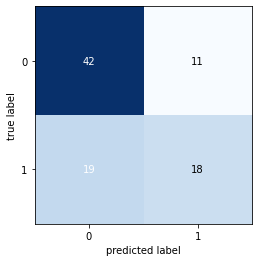

In [156]:

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
matriz_confusao = confusion_matrix(y_test, y_pred)

fig,ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [157]:
print(classification_report(y_test, y_pred))#67 por cento de acurácia!

              precision    recall  f1-score   support

           0       0.69      0.79      0.74        53
           1       0.62      0.49      0.55        37

    accuracy                           0.67        90
   macro avg       0.65      0.64      0.64        90
weighted avg       0.66      0.67      0.66        90



MLP

In [158]:
from sklearn.neural_network import MLPClassifier

In [159]:
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,
10), random_state=1)

In [160]:
clf_mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [161]:
y_pred = clf_mlp.predict(X_test)

In [162]:
print(classification_report(y_test, y_pred))#71 por cento de acurácia

              precision    recall  f1-score   support

           0       0.68      0.96      0.80        53
           1       0.87      0.35      0.50        37

    accuracy                           0.71        90
   macro avg       0.77      0.66      0.65        90
weighted avg       0.76      0.71      0.67        90



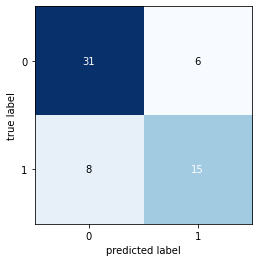

In [130]:

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
matriz_confusao = confusion_matrix(y_test, y_pred)

fig,ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

Utilizando a função mostrada no enunciado, implemente duas chamadas sequenciais e outra chamada sendo realizada por duas threads de maneira concorrente. Sobre essas duas diferentes formas de implementação é CORRETO afirmar:



In [1]:
import threading
import time
import random 
def contador():
    x = 1000000000
    while x>0:
        x=-1
def imple_sequencial():
    contador()
    contador()
def imple_concorrente():
    thread_1=threading.Thread(target=contador)
    thread_2=threading.Thread(target=contador)

time.sleep(random.randint(1,20))

In [2]:
ops = [5,4,3,2,1]
ops.filter(lambda i:i>0)

AttributeError: ignored

In [11]:
import rx
from rx import operators as ops

source = rx.from_iterable([5,4,3,"2",1])

composed = source.pipe(
    ops.map(lambda i:i if i<3 else 0),
    ops.filter(lambda i: i >0),
    ops.filter(lambda i:i%2==0)
).subscribe(on_next=lambda i: print("on_next: {}".format(i)),
on_completed=lambda: print("on_completed"),
on_error=lambda e:print("on_error: {}".format(e)))

on_error: '<' not supported between instances of 'str' and 'int'


In [18]:
!pip install pygame

In [21]:
import pygame
from pygame.locals import *
from sys import exit
import os
os.environ['SDL_VIDEODRIVER']='dummy'

pygame.init()

screen = pygame.display.set_mode((720,640))
pygame.display.set_caption("desafio-mod-4")

while True:
    for event in pygame.event.get():
        if event.type==QUIT:
            pygame.quit()
            exit()

        screen.fill((255,0,255))
        x,y = pygame.mouse.get_pos()
        print(x,y)

0 0


KeyboardInterrupt: ignored